### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [292]:
Data = pd.read_csv('Data.csv')
Item = pd.read_csv('Item.csv')
User = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [9]:
Data.info() #Displaying columns, data types of those columns, signifies whether there are any null values or not etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [12]:
Data.shape #Data data fram has 100000 rows and 4 columns 

(100000, 4)

In [14]:
Data.describe()    # Shows the count, Five Plot Summary and quartiles for the Data dataframe

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [17]:
Data.isnull().sum().sum() #signifies that there are zero null values in rows and columns both 

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [20]:
Item.head() # use sum on the default axis

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
number_of_movies = pd.read_csv('Item.csv')
number_of_movies
number_of_movies['unknown'].value_counts()

0    1680
1       1
Name: unknown, dtype: int64

In [115]:
total = Item.sum(axis = 0, skipna = True)
total #wanted to use iloc[:, [3::]]. sum .... to only display the index position 3 to 999999 but somehow didn't work

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [89]:
Item1 = Item.drop('movie id', axis=1)
print(Item1)



#hint: use sum on the axis = 1

                                         movie title release date  unknown  \
0                                         Toy Story   01-Jan-1995        0   
1                                         GoldenEye   01-Jan-1995        0   
2                                        Four Rooms   01-Jan-1995        0   
3                                        Get Shorty   01-Jan-1995        0   
4                                           Copycat   01-Jan-1995        0   
5     Shanghai Triad (Yao a yao yao dao waipo qiao)   01-Jan-1995        0   
6                                    Twelve Monkeys   01-Jan-1995        0   
7                                              Babe   01-Jan-1995        0   
8                                  Dead Man Walking   01-Jan-1995        0   
9                                       Richard III   22-Jan-1996        0   
10                                    Seven (Se7en)   01-Jan-1995        0   
11                              Usual Suspects, The   14-Aug-199

In [90]:
total1 = Item1.sum(axis = 1, skipna = True)
print(total1)
#Find the movies that have more than one genre

0       3
1       3
2       1
3       3
4       3
5       1
6       2
7       3
8       1
9       2
10      2
11      2
12      1
13      2
14      1
15      2
16      5
17      1
18      1
19      2
20      5
21      3
22      2
23      3
24      1
25      1
26      1
27      3
28      4
29      1
       ..
1651    1
1652    1
1653    2
1654    2
1655    2
1656    1
1657    1
1658    1
1659    1
1660    2
1661    2
1662    1
1663    1
1664    1
1665    1
1666    1
1667    3
1668    2
1669    1
1670    1
1671    2
1672    1
1673    1
1674    1
1675    1
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [94]:
Item2 = Item[Item['unknown'] == 0] 
print(Item2)

      movie id                                     movie title release date  \
0            1                                      Toy Story   01-Jan-1995   
1            2                                      GoldenEye   01-Jan-1995   
2            3                                     Four Rooms   01-Jan-1995   
3            4                                     Get Shorty   01-Jan-1995   
4            5                                        Copycat   01-Jan-1995   
5            6  Shanghai Triad (Yao a yao yao dao waipo qiao)   01-Jan-1995   
6            7                                 Twelve Monkeys   01-Jan-1995   
7            8                                           Babe   01-Jan-1995   
8            9                               Dead Man Walking   01-Jan-1995   
9           10                                    Richard III   22-Jan-1996   
10          11                                  Seven (Se7en)   01-Jan-1995   
11          12                            Usual Susp

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [134]:
# release = 'My*cat*is*brown'
print(Item["release date"].str.split('-')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

# print(a[10:])
# print(a[-5:])

['01', 'Jan', '1995']


In [123]:
import datetime

In [157]:
User.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

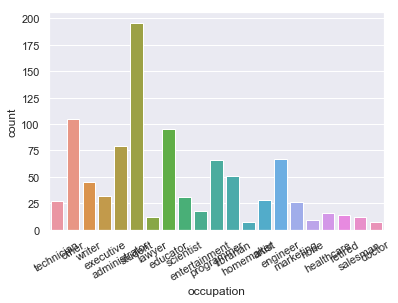

In [163]:
g=sns.countplot(x="occupation", data=User)
g.set_xticklabels(rotation=30,labels=User.occupation.unique())

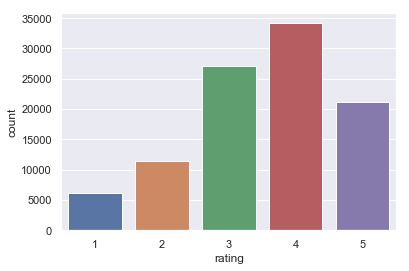

In [155]:
sns.countplot(x="rating", data=Data)

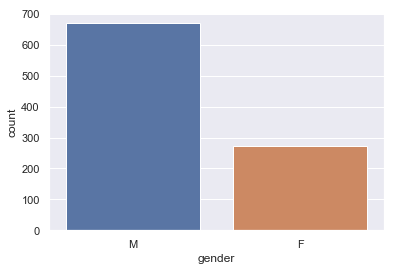

In [148]:
sns.countplot(x="gender", data=User)

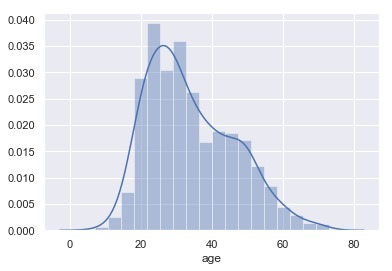

In [138]:
sns.distplot(User.age)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [181]:
"01-Jan-1995".split("-")[2]

'1995'

In [185]:
year=[]
for i in Item['release date']:
    year.append(str(i).split("-")[2])
#Item[['date','month','year']]=
#Item.groupby(['release date']).sum()

In [188]:
Item['year']=year

In [205]:
df = Item.groupby(['year'], as_index = False).sum()
df = df.loc[df["year"] >= "1958"]

In [206]:
heatmap1_data = pd.pivot_table(df, values=['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'], 
                     columns='year')

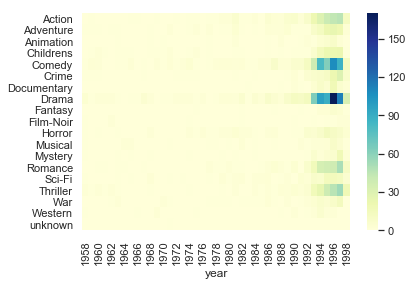

In [207]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [116]:
df = pd.DataFrame({'Genre': ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']},
                  index=['Release date'])
 
df.set_index(["unknown","Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]).count(level="movie title")

ValueError: Shape of passed values is (19, 1), indices imply (1, 1)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [293]:
x=Data.groupby(['movie id']).count().reset_index()
x=x[x.rating>100]
x=x[['movie id']]
x=x.merge(Item[['movie id','movie title']],on='movie id',how='inner')
Data1=Data.merge(x,on='movie id',how='left')
Data1=Data1.dropna()
m=Data1.groupby(['movie title'],as_index=False).mean()
m.sort_values(by='rating',ascending=False)

,movie title,user id,movie id,rating,timestamp
63,"Close Shave, A",443.142857,408.0,4.491071,8.823304e+08
259,Schindler's List,469.714765,318.0,4.466443,8.834050e+08
330,"Wrong Trousers, The",454.483051,169.0,4.466102,8.828888e+08
54,Casablanca,471.831276,483.0,4.456790,8.834745e+08
268,"Shawshank Redemption, The",441.187279,64.0,4.445230,8.826119e+08
247,Rear Window,468.650718,603.0,4.387560,8.837371e+08
318,"Usual Suspects, The",448.382022,12.0,4.385768,8.829016e+08
290,Star Wars,471.384220,50.0,4.358491,8.830261e+08
1,12 Angry Men,453.552000,178.0,4.344000,8.828963e+08
59,Citizen Kane,466.853535,134.0,4.292929,8.833150e+08


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [294]:
Item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [295]:
User.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [296]:
Data.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [333]:
my_data=Data.merge(Item[['movie id','unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']],on='movie id',how='left')
my_data=my_data.merge(User[['user id','gender']], on='user id', how='left')

nm=my_data.groupby('gender',as_index=False).sum()
nm['gender_count']=my_data.groupby('gender',as_index=False).count().iloc[:,-1]

In [334]:
nm['Romance']=nm['Romance']/nm['gender_count']
nm['Sci-Fi']=nm['Sci-Fi']/nm['gender_count']
nm['Drama']=nm['Drama']/nm['gender_count']

In [335]:
nm[['gender','Romance']]

,gender,Romance
0,F,0.227601
1,M,0.183198


In [336]:
nm[['gender','Sci-Fi']]

,gender,Sci-Fi
0,F,0.102145
1,M,0.136035


In [337]:
nm[['gender','Drama']]

,gender,Drama
0,F,0.427694
1,M,0.389035


In [313]:
nm.columns

Index(['gender', 'user id', 'movie id', 'rating', 'timestamp', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')